<a href="https://colab.research.google.com/github/simranmishra1708/customer-segmentation/blob/main/Simran_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [156]:
#loading the data from csv file
customer_data=pd.read_csv('/content/Customers.csv')

In [47]:
#first 5 rows in the data frame
customer_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [48]:
# finding the no of rows and columns
customer_data.shape

(2627, 10)

In [49]:
# getting some info about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [50]:
# checking for missing values
customer_data.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [51]:
# replacing missing data with mode
for column in customer_data.columns:
  customer_data[column].fillna(customer_data[column].mode()[0],inplace=True)

In [52]:
customer_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,Artist,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,1.0,Low,4.0,Cat_6


In [57]:
# replacing column values
df=customer_data.replace(['Low','Average','High'],[0,1,2])
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,0,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,1,4.0,Cat_6
2,458996,Female,Yes,69,No,Artist,0.0,0,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,2,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,1.0,0,4.0,Cat_6


Clustering for Age & Spending Score

In [87]:
X=df.iloc[:,[3,7]].values

In [88]:
print(X)

[[36  0]
 [37  1]
 [69  0]
 ...
 [53  0]
 [47  2]
 [43  0]]


Choosing the number of clusters

WCSS - Within Clusters Sum of Squares

In [89]:
# finding wcss values for different number of clusters
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

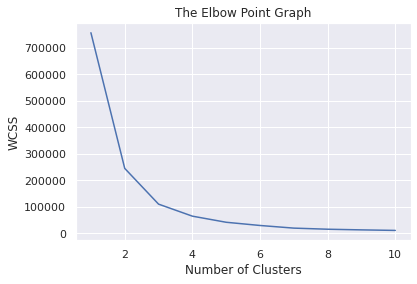

In [90]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum number of clusters = 3

Training the k-means clustering model

In [92]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
# return a label for each data point based on their cluster
Y=kmeans.fit_predict(X)

print(Y)

[0 1 2 ... 1 1 1]


3 Clusters- 0,1,2

Visualizing all the clusters

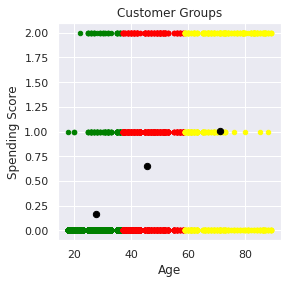

In [95]:
# plotting all the clusters and their centroids
plt.figure(figsize=(4,4))
plt.scatter(X[Y==0,0],X[Y==0,1],s=20,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=20,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=20,c='yellow',label='Cluster 3')

# plot the Centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=40,c='black',label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

Clustering for Work Experience and Spending Score

In [96]:
X=df.iloc[:,[6,7]].values

In [97]:
print(X)

[[0. 0.]
 [8. 1.]
 [0. 0.]
 ...
 [1. 0.]
 [1. 2.]
 [9. 0.]]


In [98]:
# finding wcss values for different number of clusters
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

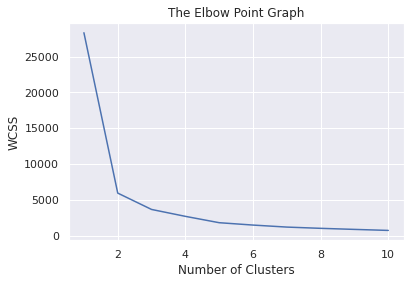

In [99]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [100]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
# return a label for each data point based on their cluster
Y=kmeans.fit_predict(X)

print(Y)

[1 2 1 ... 1 1 2]


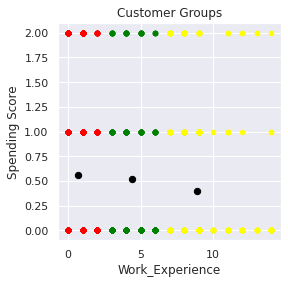

In [101]:
# plotting all the clusters and their centroids
plt.figure(figsize=(4,4))
plt.scatter(X[Y==0,0],X[Y==0,1],s=20,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=20,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=20,c='yellow',label='Cluster 3')

# plot the Centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=40,c='black',label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Work_Experience')
plt.ylabel('Spending Score')
plt.show()

Clustering for Family Size and Spending Score

In [102]:
X=df.iloc[:,[8,7]].values

In [103]:
print(X)

[[1. 0.]
 [4. 1.]
 [1. 0.]
 ...
 [2. 0.]
 [5. 2.]
 [3. 0.]]


In [104]:
# finding wcss values for different number of clusters
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

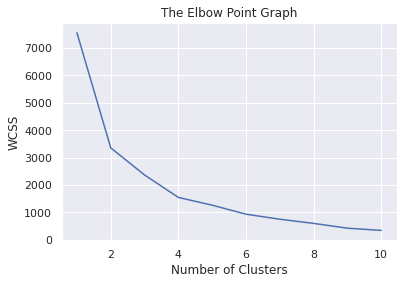

In [105]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [106]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
# return a label for each data point based on their cluster
Y=kmeans.fit_predict(X)

print(Y)

[3 0 3 ... 3 1 0]


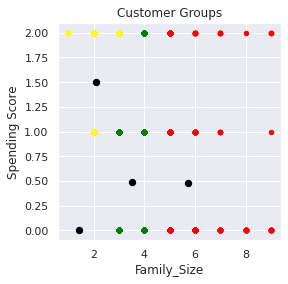

In [107]:
# plotting all the clusters and their centroids
plt.figure(figsize=(4,4))
plt.scatter(X[Y==0,0],X[Y==0,1],s=20,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=20,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=20,c='yellow',label='Cluster 3')

# plot the Centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=40,c='black',label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Family_Size')
plt.ylabel('Spending Score')
plt.show()

Clustering for Age and Family Size

In [108]:
X=df.iloc[:,[3,8]].values

In [109]:
print(X)

[[36.  1.]
 [37.  4.]
 [69.  1.]
 ...
 [53.  2.]
 [47.  5.]
 [43.  3.]]


In [110]:
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

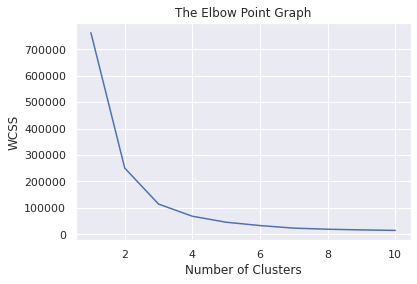

In [111]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [112]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
# return a label for each data point based on their cluster
Y=kmeans.fit_predict(X)

print(Y)

[2 1 0 ... 1 1 1]


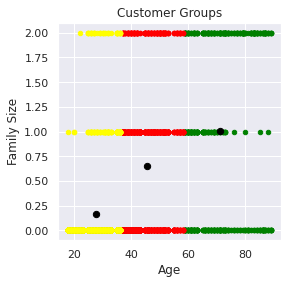

In [143]:
# plotting all the clusters and their centroids
plt.figure(figsize=(4,4))
plt.scatter(X[Y==0,0],X[Y==0,1],s=20,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=20,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=20,c='yellow',label='Cluster 3')

# plot the Centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=40,c='black',label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.show()

Clustering for Age,Spending Score & Family Size

In [144]:
X=df.iloc[:,[3,7,8]].values

In [145]:
print(X)

[[36.  0.  1.]
 [37.  1.  4.]
 [69.  0.  1.]
 ...
 [53.  0.  2.]
 [47.  2.  5.]
 [43.  0.  3.]]


In [146]:
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

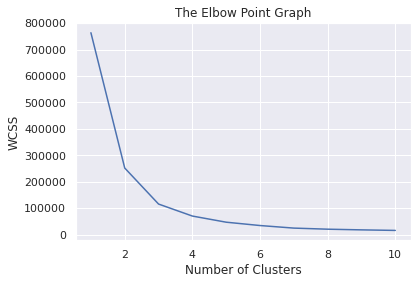

In [147]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [148]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
# return a label for each data point based on their cluster
Y=kmeans.fit_predict(X)

print(Y)

[2 1 0 ... 1 1 1]


TypeError: ignored

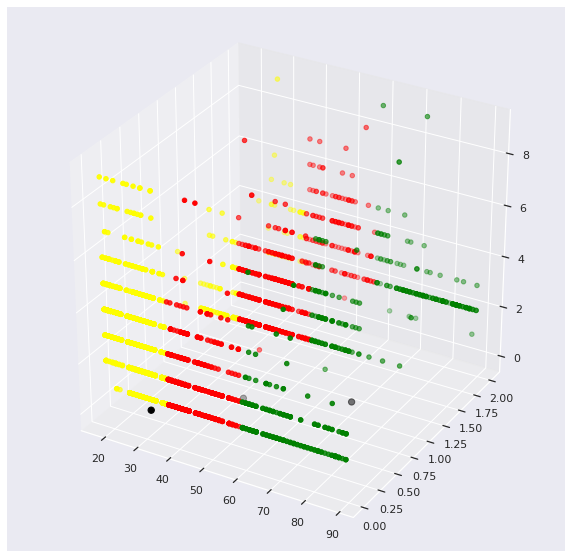

In [157]:
# plotting all the clusters and their centroids
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10,10))
plt=fig.add_subplot(111,projection='3d')
plt.scatter(X[Y==0,0],X[Y==0,1],X[Y==0,2],s=20,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],X[Y==1,2],s=20,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],X[Y==2,2],s=20,c='yellow',label='Cluster 3')

# plot the Centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=40,c='black',label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.zlabel('Family Size')
plt.show()